# In this notebook we try out various decompositions of the $Q^*$ and $Q^{**}$ terms
I am piggy backing here on an already written out zarr store in temp storage (originally to make videos). To remake the data, see `scale-aware-air-sea/pipeline/cm26_decompose_small_scale_signal.ipynb`


- Show the Q star decomp (snapshot/mean) **formula**
- Show the Q star star decomp (snapshot/mean) **formula**
- Test if $$ Q^* = Q^{**} - Q_L^\prime $$ holds.
- To save computations I could e.g. compute the residuals on the fly. The hard part that needs presaving is the filtering.

In [9]:
import gcsfs
import xarray as xr
from dask.diagnostics import ProgressBar
import matplotlib.pyplot as plt

In [5]:
# Load temp data
fs = gcsfs.GCSFileSystem()
path = 'leap-scratch/jbusecke/scale-aware-air-sea/visualization/CM26_output_global_v3.zarr'
mapper = fs.get_mapper(path)
ds = xr.open_dataset(mapper, engine='zarr', chunks={})
ds

<xarray.Dataset>
Dimensions:   (term: 20, time: 300, yt_ocean: 2700, xt_ocean: 3600)
Coordinates:
    algo      <U8 ...
  * term      (term) <U17 'Q_H' 'Q_H_bar' ... 'Q_star_res' 'Q_star_star_res'
  * time      (time) object 0181-01-01 12:00:00 ... 0181-10-27 12:00:00
  * xt_ocean  (xt_ocean) float64 -279.9 -279.8 -279.7 ... 79.75 79.85 79.95
  * yt_ocean  (yt_ocean) float64 -81.11 -81.07 -81.02 ... 89.89 89.94 89.98
Data variables:
    evap      (term, time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 3, 2700, 3600), meta=np.ndarray>
    qh        (term, time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 3, 2700, 3600), meta=np.ndarray>
    ql        (term, time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 3, 2700, 3600), meta=np.ndarray>
    taux      (term, time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 3, 2700, 3600), meta=np.ndarray>
    tauy      (term, time, yt_ocean, xt_ocean) float32 dask.array<chunksize=(1, 3, 2700, 3600), meta=np.ndarray>

In [8]:
# example data
sub = slice(0,None,5)
da = ds_final_reloaded['ql'].isel(xt_ocean=sub, yt_ocean=sub)

## Plot Decompositions

$Q_{L,prime}$


<Figure size 640x480 with 0 Axes>

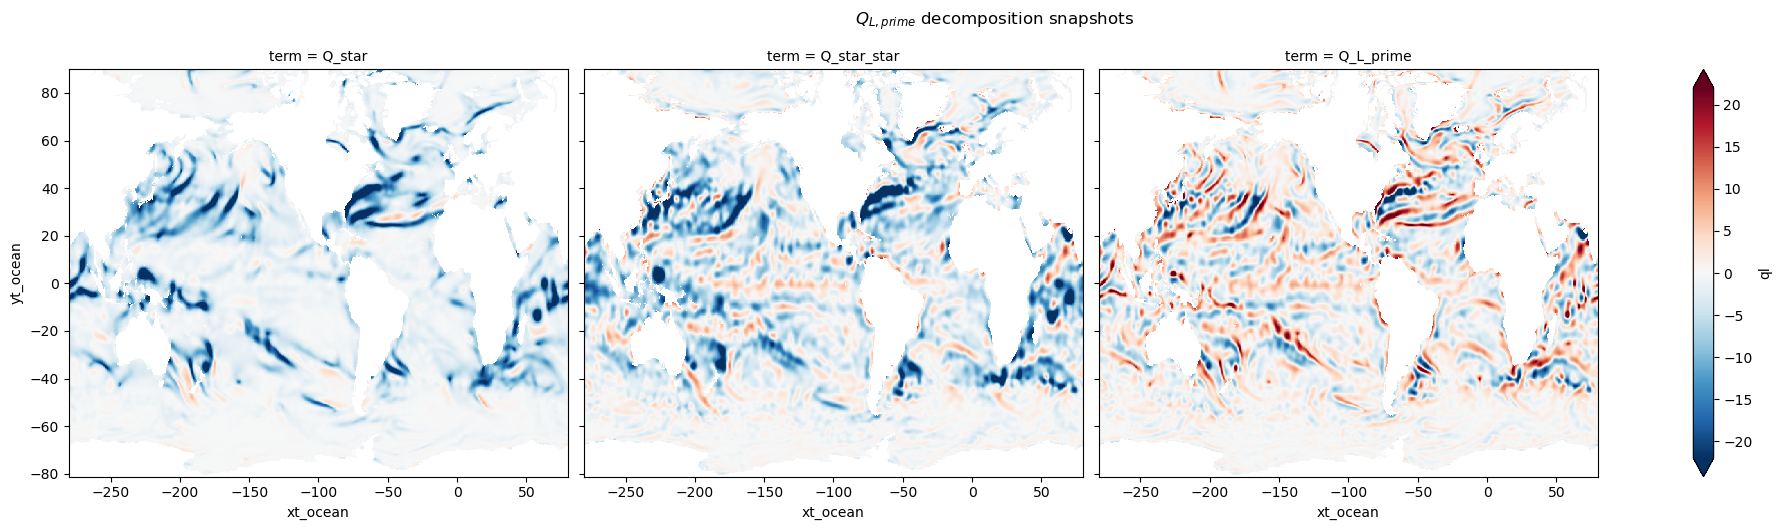

<Figure size 640x480 with 0 Axes>

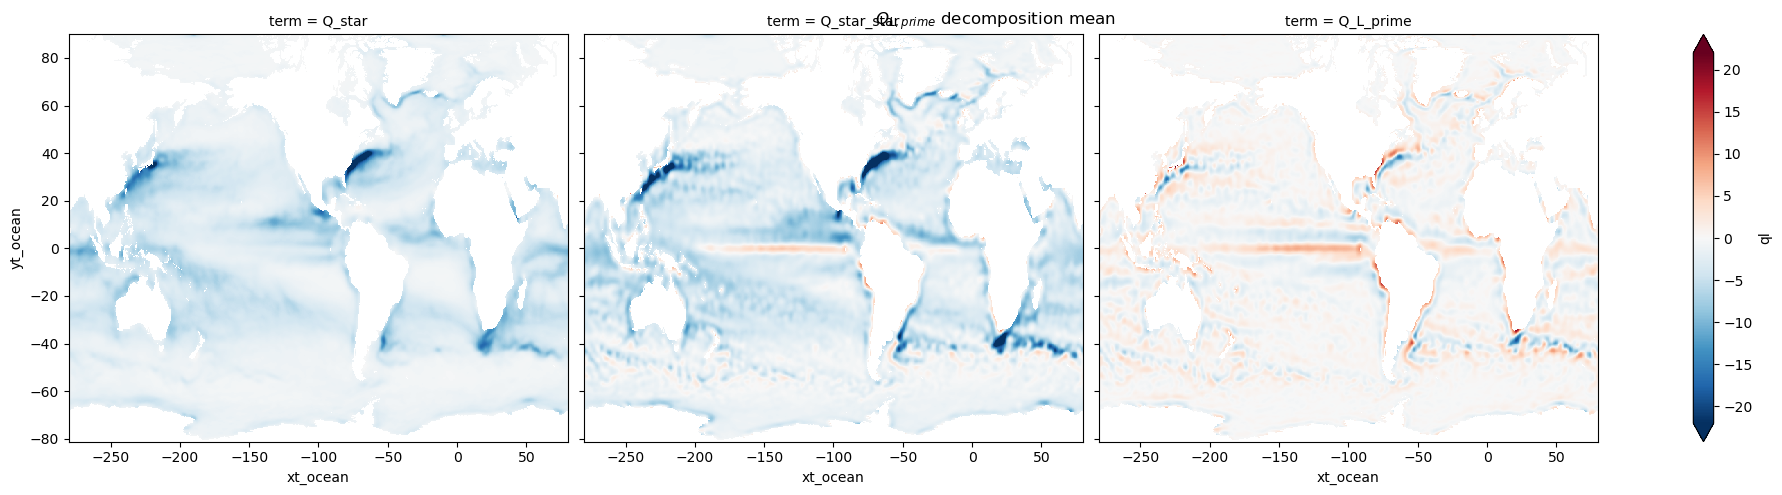

$Q^*$


<Figure size 640x480 with 0 Axes>

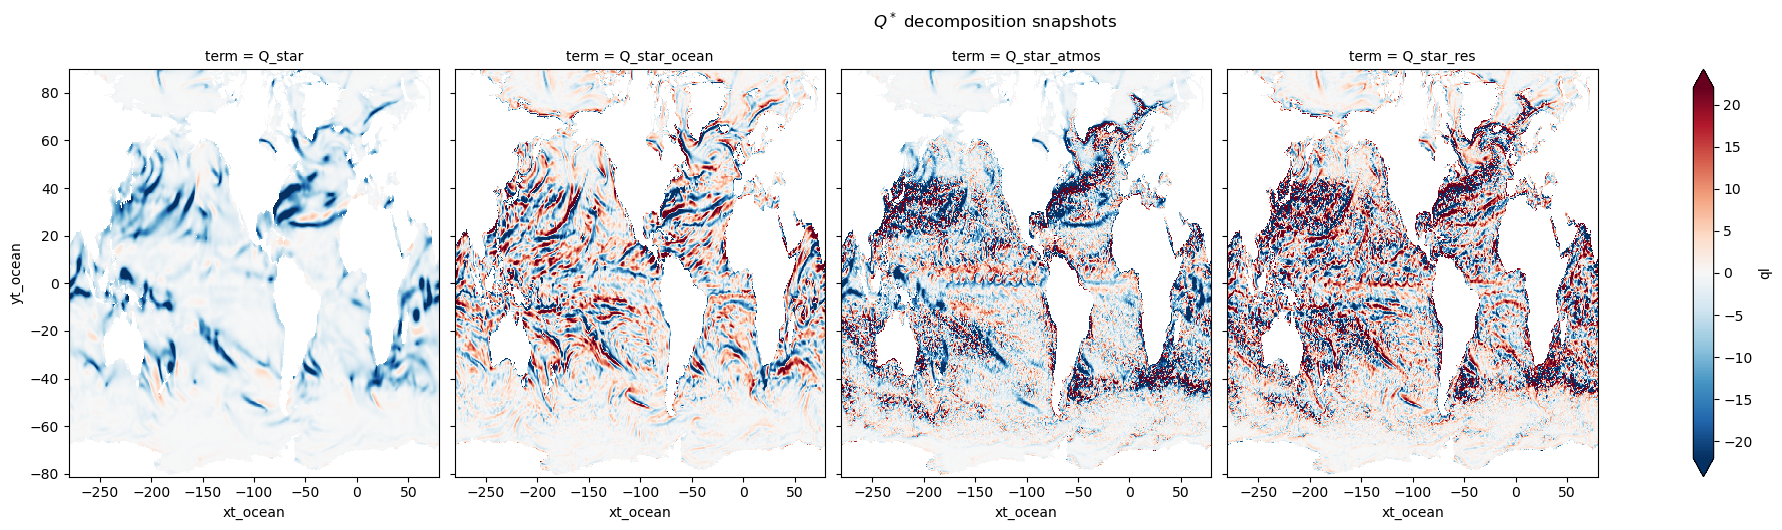

<Figure size 640x480 with 0 Axes>

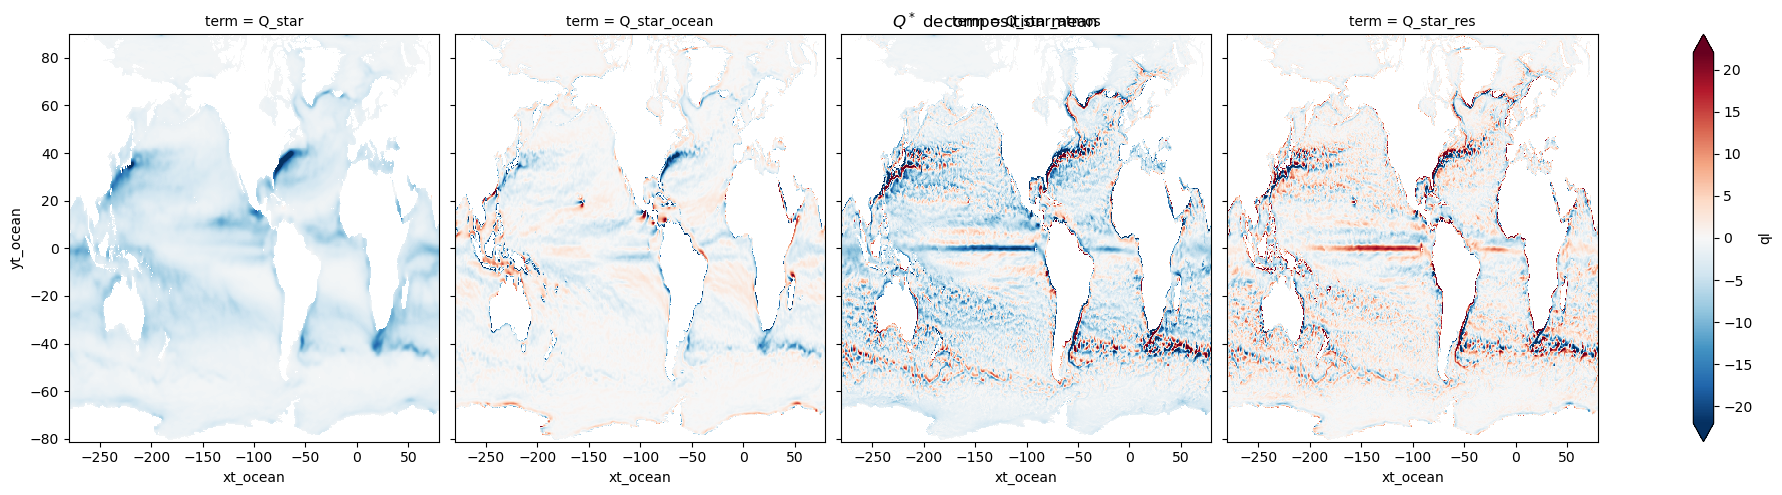

$Q^{**}$


<Figure size 640x480 with 0 Axes>

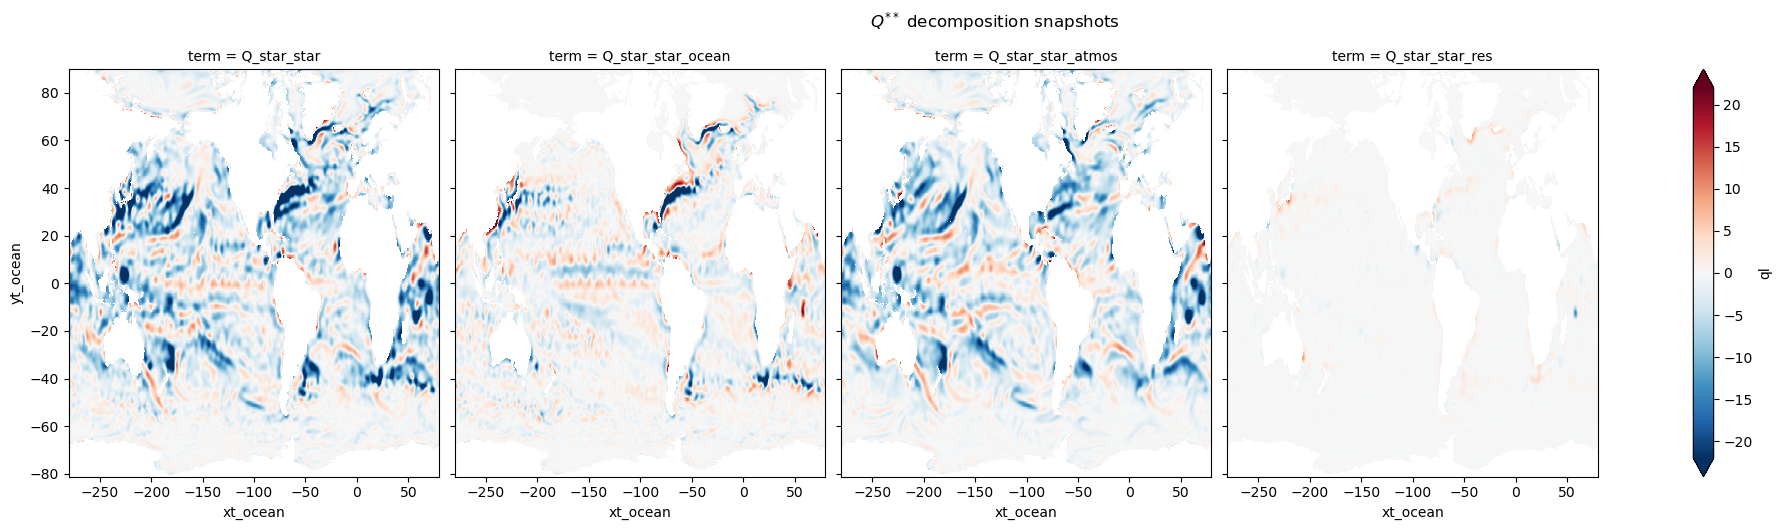

<Figure size 640x480 with 0 Axes>

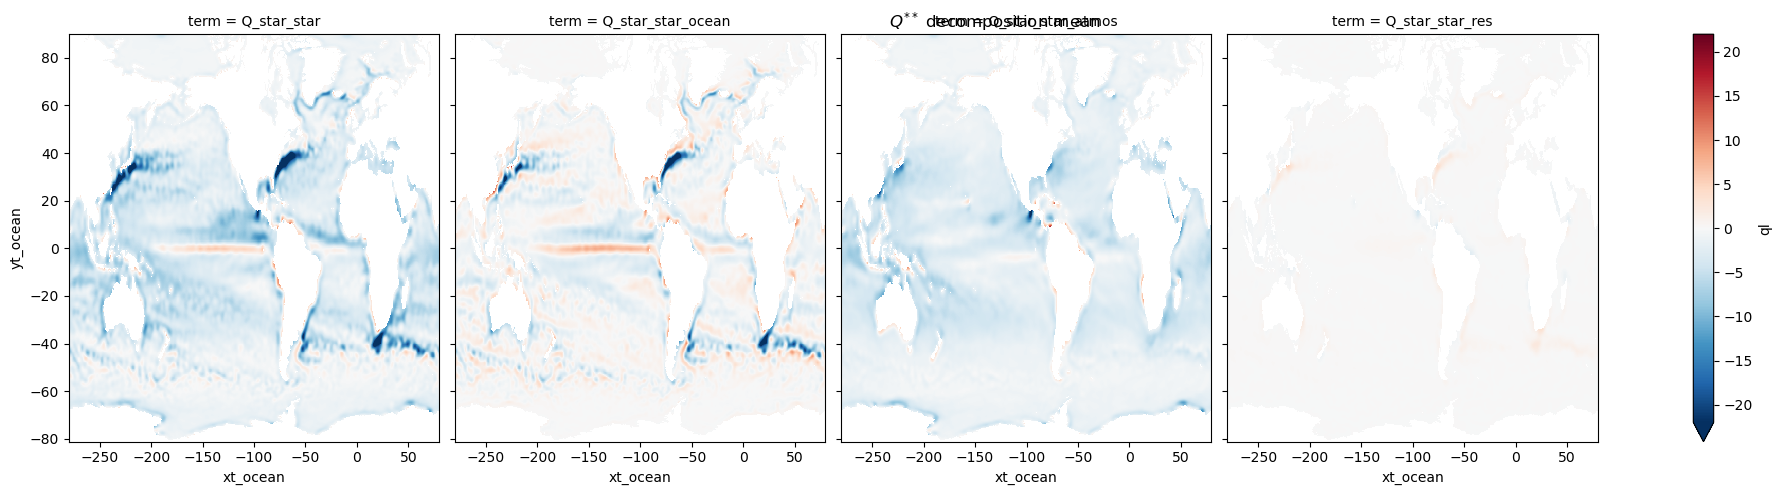

$Q^*_{wrong}$


<Figure size 640x480 with 0 Axes>

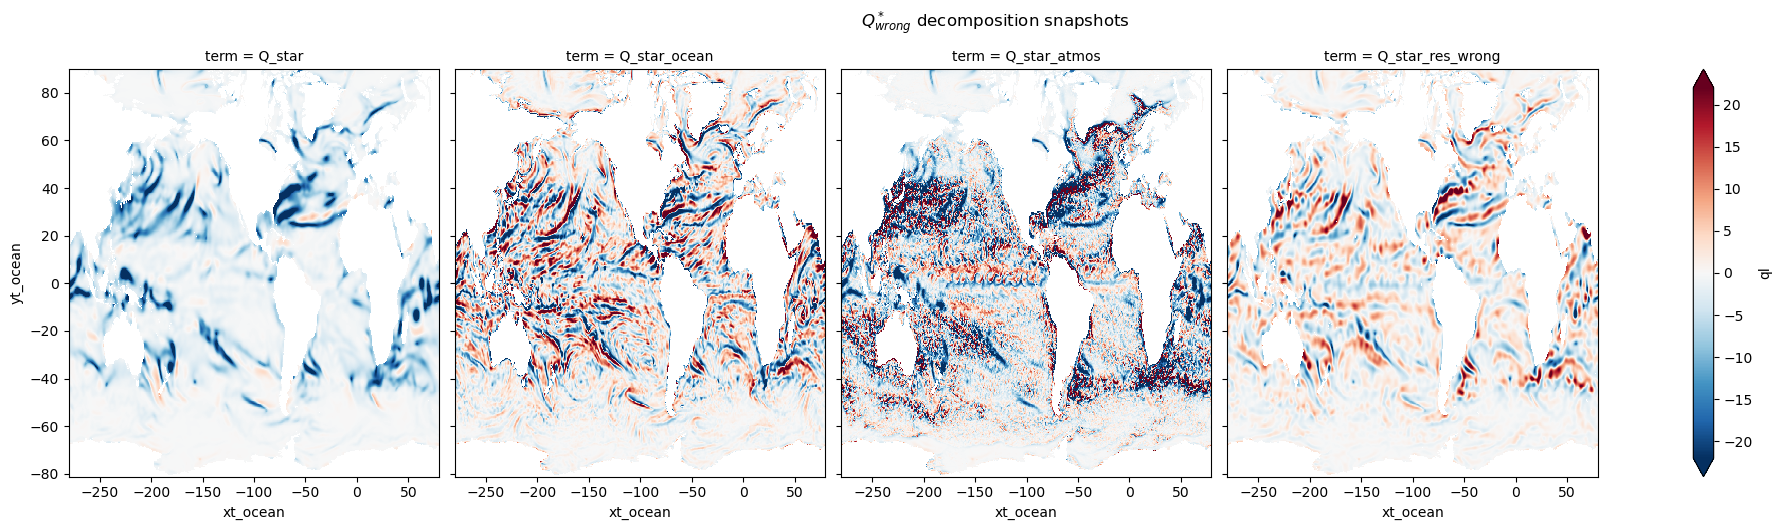

<Figure size 640x480 with 0 Axes>

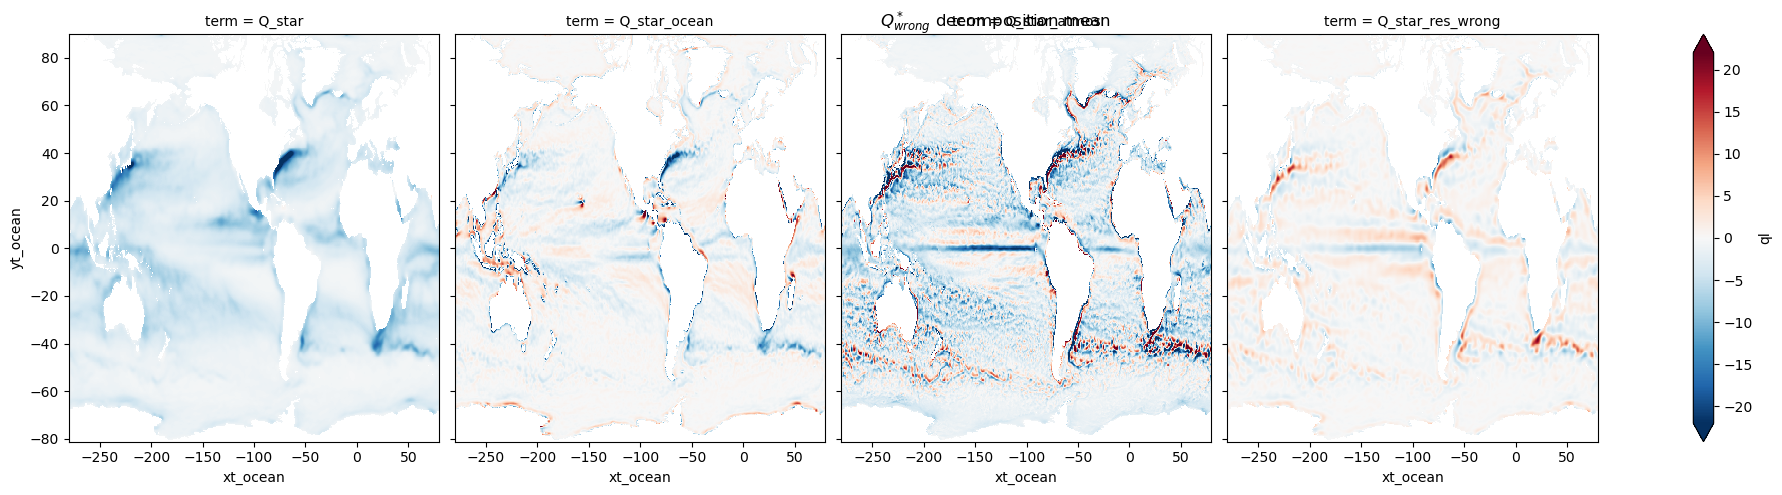

In [26]:
for title, terms in [
    ('$Q_{L,prime}$',['Q_star', 'Q_star_star', 'Q_L_prime']),
    ('$Q^*$',['Q_star', 'Q_star_ocean', 'Q_star_atmos','Q_star_res']), 
    ('$Q^{**}$',['Q_star_star', 'Q_star_star_ocean', 'Q_star_star_atmos','Q_star_star_res']),
    ('$Q^*_{wrong}$',['Q_star', 'Q_star_ocean', 'Q_star_atmos','Q_star_res_wrong']),
    
]:
    print(title)
    da_plot = da.sel(term=terms)
    plt.figure()
    da_plot.isel(time=0).plot(col='term', vmax=22, figsize=[20,5])
    plt.suptitle(f"{title} decomposition snapshots", y=1.05)
    plt.show()
    plt.figure()
    da_plot.mean('time').plot(col='term', vmax=22, figsize=[20,5])
    plt.suptitle(f"{title} decomposition mean")
    plt.show()

## Test Q_L_prime hypotheis (works!)

In [18]:
test_res = da.sel(term='Q_star') - da.sel(term='Q_star_star') + da.sel(term='Q_L_prime')

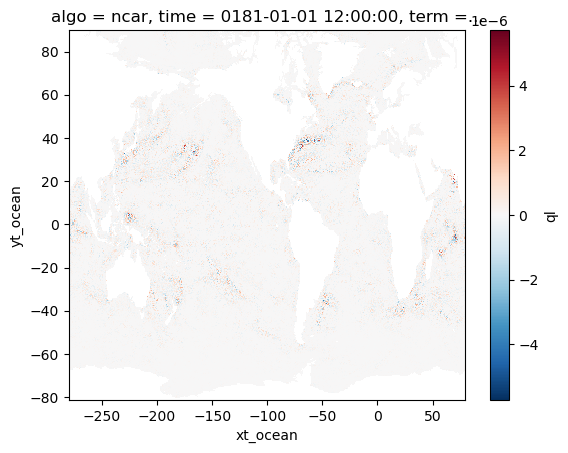

In [25]:
test_res.isel(time=0).plot()

this is 7 order of magnitude smaller than the other terms!